# Decision Tree graphviz  & Feature Importance
결정트리 그래프 시각화와 피처 중요도


## 붓꽃데이터로 모델학습

In [40]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=10)

# 붓꽃 데이터 로딩, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=10)

#학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

## 1 ) Jupyter notebook

In [41]:
#@title 기본 제목 텍스트
from sklearn.tree import export_graphviz

# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity=True, filled=True)

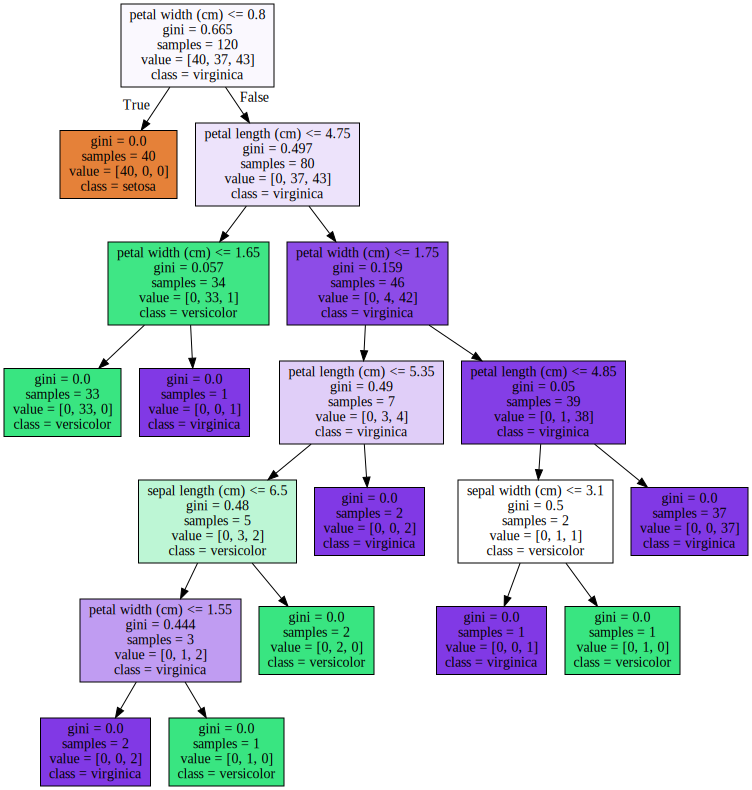

In [42]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

## 2) Google Colab

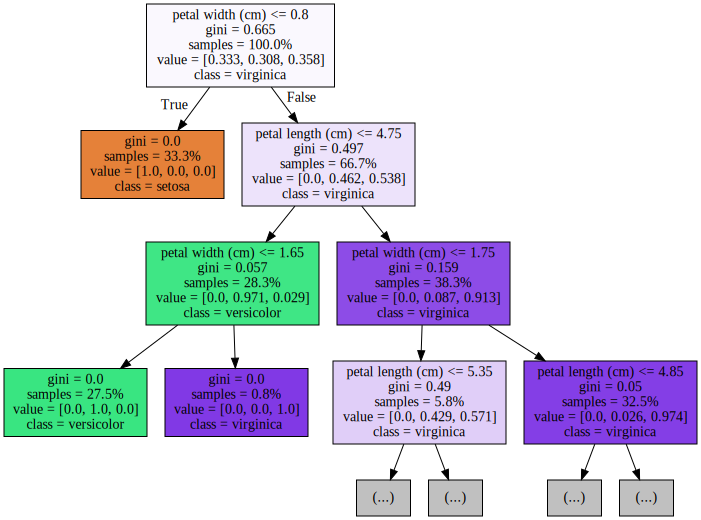

In [43]:
dot_data = export_graphviz(dt_clf
                          , max_depth=3
                          , feature_names=iris_data.feature_names
                          , class_names=iris_data.target_names
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

# 피처 중요도 - feature_importances_

Feature importances : 
[0.013 0.013 0.407 0.567]
sepal length (cm) : 0.013
sepal width (cm) : 0.013
petal length (cm) : 0.407
petal width (cm) : 0.567


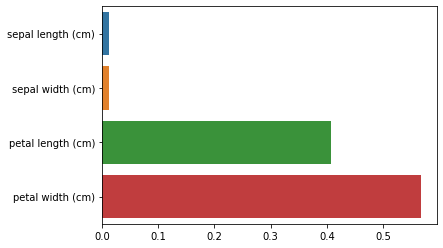

In [49]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances : \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_) :
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)
